In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Consts 
k1 = 10**(-1.47)
k2 = 10**(-2.59)
k3 = 10**(-3.76)
k4 = 10**(-10.329)
yppm = 415e-06

xCO2 0.876, xHCO3 0.124, xCO3 1.83e-06


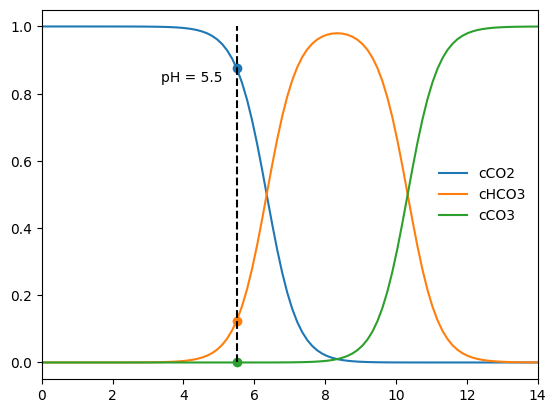

In [60]:
# Eq Consts Only
ph = 5.5 # Avoid if possible
cb = k1 * yppm * 1
cd = k2 * cb
ce = 10**(-ph)
cf = k3 * cd / ce
cg = k4 * cf / ce
ct = cb + cf + cg
print('xCO2 {:.3g}, xHCO3 {:.3g}, xCO3 {:.3g}'.format(cb/ct, cf/ct, cg/ct))

## functionalized
def phK(pH): 
    global k1, k2, k3, k4, yppm
    cb = k1 * yppm * 1
    cd = k2 * cb
    ce = 10**(-pH)
    cf = k3 * cd / ce
    cg = k4 * cf / ce
    ct = cb + cf + cg
    xs = [cb/ct, cf/ct, cg/ct]
    return xs

phs = np.linspace(0, 14, 100)
xs = phK(phs)
plt.plot(phs, xs[0], label='cCO2') 
plt.plot(phs, xs[1], label='cHCO3') 
plt.plot(phs, xs[2], label='cCO3') 
plt.plot([ph]*2, [0, 1], '--k')
plt.scatter(ph, cb/ct, c='C0')
plt.annotate('pH = {}'.format(ph), (ph, cb/ct), xytext = (-10, -10), textcoords='offset points', ha='right')
plt.scatter(ph, cf/ct, c='C1')
plt.scatter(ph, cg/ct, c='C2')

plt.xlim(0, 14)
plt.legend(frameon=False)
plt.show()

xCO2 0.816, xHCO3 0.184, xCO3 1.71e-06


ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

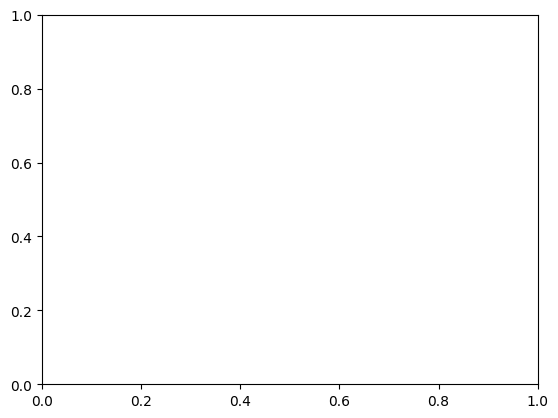

In [67]:
# Extent of Reaction
ph = 5.5 # Avoid if possible
ce = 10**(-ph)

x4 = k4*k3*k2*k1*yppm/ce**2
cg = x4
x3 = ce - x4
cf = x3 - x4
cb = k1*yppm
cd = k2*cb
x2 = cd + x3
x1 = x2 + cb
ct = cb + cf + cg
print('xCO2 {:.3g}, xHCO3 {:.3g}, xCO3 {:.3g}'.format(cb/ct, cf/ct, cg/ct))

## functionalized
def phK2(pH): 
    global k1, k2, k3, k4, yppm
    
    x4 = k4*k3*k2*k1*yppm/ce**2
    cg = x4
    x3 = ce - x4
    cf = x3 - x4
    cb = k1*yppm
    cd = k2*cb
    x2 = cd + x3
    x1 = x2 + cb
    ct = cb + cf + cg
    xs = [cb/ct, cf/ct, cg/ct]
    return xs

phs = np.linspace(0, 14, 100)
xs = phK2(phs)
plt.plot(phs, xs[0], label='cCO2') 
plt.plot(phs, xs[1], label='cHCO3') 
plt.plot(phs, xs[2], label='cCO3') 
plt.plot([ph]*2, [0, 1], '--k')
plt.scatter(ph, cb/ct, c='C0')
plt.annotate('pH = {}'.format(ph), (ph, cb/ct), xytext = (-10, -10), textcoords='offset points', ha='right')
plt.scatter(ph, cf/ct, c='C1')
plt.scatter(ph, cg/ct, c='C2')

plt.xlim(0, 14)
plt.legend(frameon=False)
plt.show()